In [1]:
# 必要依赖：https://github.com/ecmwf/cfgrib
# conda install -c conda-forge eccodes
# conda install -c conda-forge cfgrib
import xarray
from datetime import datetime, timedelta
import numpy
import matplotlib.pyplot as plt

In [2]:
# Forecast albedo 0.1° x 0.1°
era5_rsd_grib = '/remote_geo01/data_fd_et/ERA5_Rsd/2018_01.grib'

In [3]:
rsd_ds = xarray.load_dataset(era5_rsd_grib, engine="cfgrib")

/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
rsd_ds.dims

Frozen(SortedKeysDict({'time': 32, 'step': 24, 'latitude': 1201, 'longitude': 951}))

In [5]:
numpy.array(rsd_ds.isel(time=1, step=0).to_array())[:,:]/(1*60*60)

array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [6]:
rsd_ds

<xarray.Dataset>
Dimensions:     (latitude: 1201, longitude: 951, step: 24, time: 32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2017-12-31 2018-01-01 ... 2018-01-31
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     int64 0
  * latitude    (latitude) float64 60.0 59.9 59.8 59.7 ... -59.8 -59.9 -60.0
  * longitude   (longitude) float64 85.0 85.1 85.2 85.3 ... 179.8 179.9 180.0
    valid_time  (time, step) datetime64[ns] 2017-12-31T01:00:00 ... 2018-02-01
Data variables:
    ssrd        (time, step, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-19T22:19:38 GRIB to CDM+CF via cfgrib-0....

In [7]:
rsd_ds.isel(time=0, step=0)

<xarray.Dataset>
Dimensions:     (latitude: 1201, longitude: 951)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2017-12-31
    step        timedelta64[ns] 01:00:00
    surface     int64 0
  * latitude    (latitude) float64 60.0 59.9 59.8 59.7 ... -59.8 -59.9 -60.0
  * longitude   (longitude) float64 85.0 85.1 85.2 85.3 ... 179.8 179.9 180.0
    valid_time  datetime64[ns] 2017-12-31T01:00:00
Data variables:
    ssrd        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-19T22:19:38 GRIB to CDM+CF via cfgrib-0....

In [8]:
demo_rsd = numpy.array(rsd_ds.to_array())[0,0,23,:,:]

[[8.08564815 8.09444444 8.10375    ...        nan        nan        nan]
 [8.26203704 8.27675926 8.29481481 ...        nan        nan        nan]
 [8.43731481 8.46064815 8.48574074 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


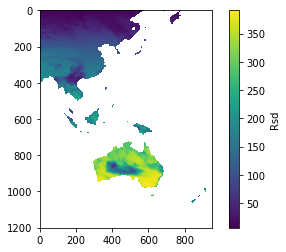

In [9]:
demo_rsd_show=demo_rsd/(24*60*60)
print(demo_rsd_show)
plt.imshow(demo_rsd_show) #！！！！！！
plt.colorbar(label='Rsd')

Text(0.5, 1.0, 'Original Rsd at UTC 2018-01-01 03:00:00')

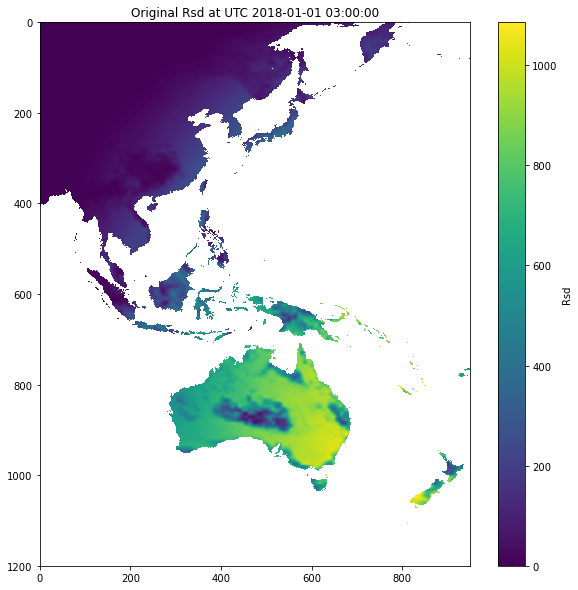

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(rsd_ds.to_array()[0,1,0, :,:]/3600, interpolation='None')
plt.colorbar(label='Rsd')
plt.title('Original Rsd at UTC 2018-01-01 03:00:00')

In [11]:
# FD extent
resolution = 0.01 # degree
lats = numpy.arange(60.-resolution/2, -60, -resolution)
lons = numpy.arange(85.+resolution/2, 180, resolution)

In [12]:
day_num = 1 # 1 -> 31(?)
hour_idx = 2 # 0 <=> 01:00:00

rsd_dh = rsd_ds.isel(time=day_num, step=hour_idx)
fd_ds = rsd_dh.interp(longitude=lons, latitude=lats, method="linear", kwargs={"fill_value": "extrapolate"}) # linear
rsd_v = fd_ds.to_array()[0]/3600

Text(0.5, 1.0, '0.01° Rsd in study extent at 2018-01-01 03:00:00')

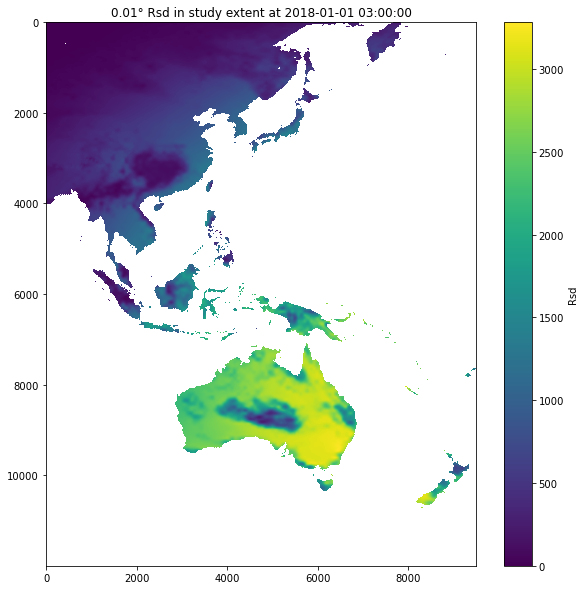

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(rsd_v, interpolation='None')
plt.colorbar(label='Rsd')
plt.title('0.01° Rsd in study extent at 2018-01-01 03:00:00')